# Lab 1

### (a)

In [1]:



def mergeInsertionSort(arr, s):
    comparisons = 0

    #merge sort
    if len(arr)>s: #if array size larger than 100 use merge
        mid = len(arr)//2

        L = arr[:mid]
        R = arr[mid:]

        #Capture and accumulate comparisons from recursive calls
        comparisons += mergeInsertionSort(L, s)
        comparisons += mergeInsertionSort(R, s)

        i=0 #pointer for left
        j=0 #pointer for right
        k=0 #pointer for main arr

        while i<len(L) and j<len(R):

            if L[i] <= R[j]:
                arr[k] = L[i]
                i+=1
            else:
                arr[k] = R[j]
                j+=1
            k+=1
            comparisons += 1

        # Copy remaining elements of L[], if there are any
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        # Copy remaining elements of R[], if there are any
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1


    #insertion sort for s<100
    else:
        for i in range(1, len(arr)):
            
            current_value = arr[i]

            #position of last element sorted
            pos = i - 1

            # Move elements of arr[0..i-1], that are
		    # greater than key, to one position ahead
		    # of their current position
            while pos >= 0:
                comparisons += 1
                if arr[pos] > current_value:
                    arr[pos + 1] = arr[pos]
                    pos -= 1
                else:
                    break

            #insert curr val into correct pos
            arr[pos + 1] = current_value

        
    return comparisons
        

'''# Code to print the list
def printList(arr):
	for i in range(len(arr)):
		print(arr[i], end=" ")
	print()
    
    '''
'''# Driver Code
# Driver Code
if __name__ == '__main__':
    arr = [12, 11, 13, 5, 6, 7]
    print("Given array is", end="\n")
    printList(arr)

    # 1. Store the returned value in a variable
    total_comparisons = mergeInsertionSort(arr, 3)

    print("Sorted array is: ", end="\n")
    printList(arr)

    # 2. Print the variable
    print(f"\nTotal comparisons made: {total_comparisons}")

    '''



'# Driver Code\n# Driver Code\nif __name__ == \'__main__\':\n    arr = [12, 11, 13, 5, 6, 7]\n    print("Given array is", end="\n")\n    printList(arr)\n\n    # 1. Store the returned value in a variable\n    total_comparisons = mergeInsertionSort(arr, 3)\n\n    print("Sorted array is: ", end="\n")\n    printList(arr)\n\n    # 2. Print the variable\n    print(f"\nTotal comparisons made: {total_comparisons}")\n\n    '

### (c) i

In [ ]:
import random
import pandas as pd

# -------------------------------------------------------------------
# (c) Analyze Time Complexity: Main Analysis Loop
# -------------------------------------------------------------------

# Parameters
sizes = [1000 * 2**i for i in range(14)]  # Up to ~8 million
S = 50  # Threshold for switching to insertion sort

results = []

print("Running analysis... (This may take some time)")
for size in sizes:
    newlst = [random.randint(0, 10**7 - 1) for _ in range(size)]
    comp = mergeInsertionSort(arr=newlst, s=S)
    results.append({'Size': size, 'Comparisons': comp})
    print(f"Size: {size}, Comparisons: {comp}")

# Create DataFrame
df = pd.DataFrame(results)

# Show the DataFrame
print("\n--- Results DataFrame ---")
print(df)

Running analysis... (This may take some time)
Size: 1000, Comparisons: 13241
Size: 2000, Comparisons: 28999
Size: 4000, Comparisons: 61210
Size: 8000, Comparisons: 131040
Size: 16000, Comparisons: 278663
Size: 32000, Comparisons: 587033
Size: 64000, Comparisons: 1238306
Size: 128000, Comparisons: 2606726
Size: 256000, Comparisons: 5471420
Size: 512000, Comparisons: 11460416
Size: 1024000, Comparisons: 23936015
Size: 2048000, Comparisons: 49918536
Size: 4096000, Comparisons: 103909418
Size: 8192000, Comparisons: 216039793

--- Results DataFrame ---
       Size  Comparisons
0      1000        13241
1      2000        28999
2      4000        61210
3      8000       131040
4     16000       278663
5     32000       587033
6     64000      1238306
7    128000      2606726
8    256000      5471420
9    512000     11460416
10  1024000     23936015
11  2048000     49918536
12  4096000    103909418
13  8192000    216039793


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

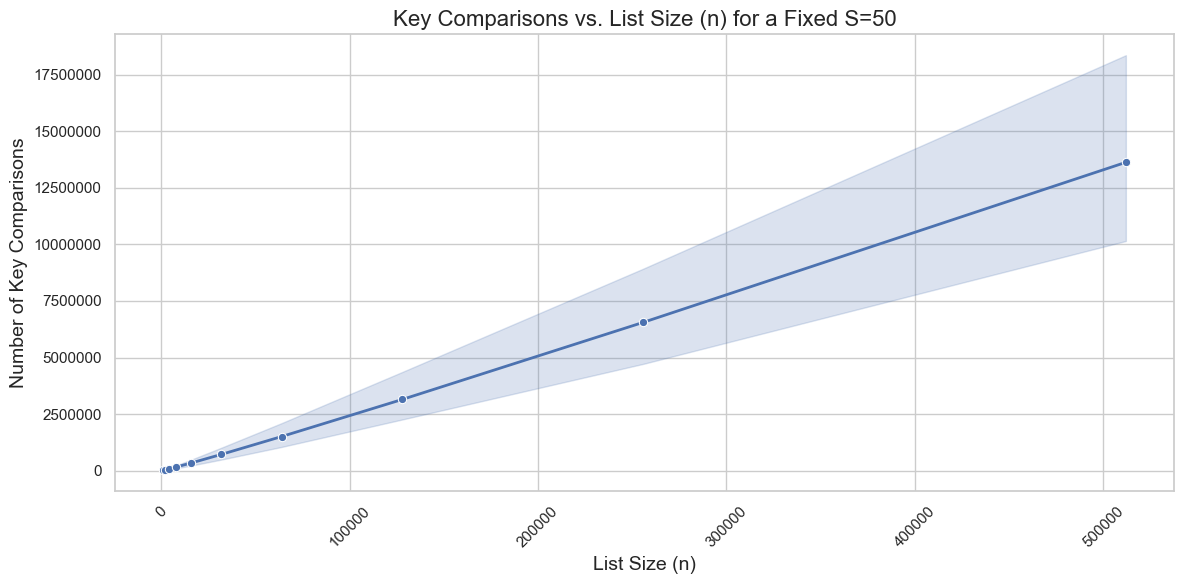

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid", context="notebook")


plt.figure(figsize=(12, 6))


sns.lineplot(data=df, x='Size', y='Comparisons', marker='o', linewidth=2)


plt.title("Key Comparisons vs. List Size (n) for a Fixed S=50", fontsize=16)
plt.xlabel("List Size (n)", fontsize=14)
plt.ylabel("Number of Key Comparisons", fontsize=14)


plt.xticks(rotation=45)


plt.ticklabel_format(style='plain', axis='y')


plt.tight_layout()


plt.show()

### shows a line that trends upwards as the list size n increases. The key observation is that this is not a straight line. The slope of the line increases as n gets larger, meaning the growth rate is faster than linear (O(n)). However, the curve is not as steep as a quadratic curve (O(n)^2), indicating the growth is slower than that.

### Theoretical Analysis

#### The time complexity of the hybrid algorithm is determined by the dominant sorting method used for large inputs.

#### The algorithm uses Insertion Sort only for small, fixed-size subarrays (where size ≤S).

#### For the overall array, the structure is that of Mergesort.

#### Therefore, the theoretical time complexity for the number of key comparisons is governed by Mergesort, which is O(nlogn).

### The empirical results from the graph perfectly align with the theoretical O(nlogn) complexity. The shape of the curve—growing slightly faster than a straight line—is the classic visual representation of an nlogn growth rate. 

### (c) ii

In [12]:
import random
import pandas as pd

# --- (c.ii) Analysis: Fixed n, Varying S (Comparisons) ---

# Test parameters for part (c.ii)
fixed_n = 250000  # A single, fixed input size
S_values = range(2, 101, 4)  # A range of S values to test

results_cii = []

print(f"--- Running Analysis (c.ii): Comparisons vs. S for a Fixed Size n={fixed_n} ---")

# (b) Generate input data: Create ONE dataset to test all S values against.
# This ensures a fair comparison, as only S is changing.
dataset = [random.randint(0, 10**7 - 1) for _ in range(fixed_n)]

# Main analysis loop
for S in S_values:
    # Use a copy of the original unsorted dataset for each run
    newlst = dataset.copy()
    comp = mergeInsertionSort(arr=newlst, s=S)
    results_cii.append({
        'S': S,
        'Comparisons': comp
    })
    print(f"S: {S}, Size: {fixed_n}, Comparisons: {comp}")

# Create DataFrame
df_cii = pd.DataFrame(results_cii)

# Show the first few rows of the resulting DataFrame
print("\n--- Results DataFrame (first 5 rows) ---")
print(df_cii.head())

--- Running Analysis (c.ii): Comparisons vs. S for a Fixed Size n=250000 ---
S: 2, Size: 250000, Comparisons: 4168075
S: 6, Size: 250000, Comparisons: 4181558
S: 10, Size: 250000, Comparisons: 4268043
S: 14, Size: 250000, Comparisons: 4268043
S: 18, Size: 250000, Comparisons: 4553948
S: 22, Size: 250000, Comparisons: 4553948
S: 26, Size: 250000, Comparisons: 4553948
S: 30, Size: 250000, Comparisons: 4897315
S: 34, Size: 250000, Comparisons: 5296139
S: 38, Size: 250000, Comparisons: 5296139
S: 42, Size: 250000, Comparisons: 5296139
S: 46, Size: 250000, Comparisons: 5296139
S: 50, Size: 250000, Comparisons: 5296139
S: 54, Size: 250000, Comparisons: 5296139
S: 58, Size: 250000, Comparisons: 5296139
S: 62, Size: 250000, Comparisons: 6974103
S: 66, Size: 250000, Comparisons: 6974103
S: 70, Size: 250000, Comparisons: 6974103
S: 74, Size: 250000, Comparisons: 6974103
S: 78, Size: 250000, Comparisons: 6974103
S: 82, Size: 250000, Comparisons: 6974103
S: 86, Size: 250000, Comparisons: 6974103
S

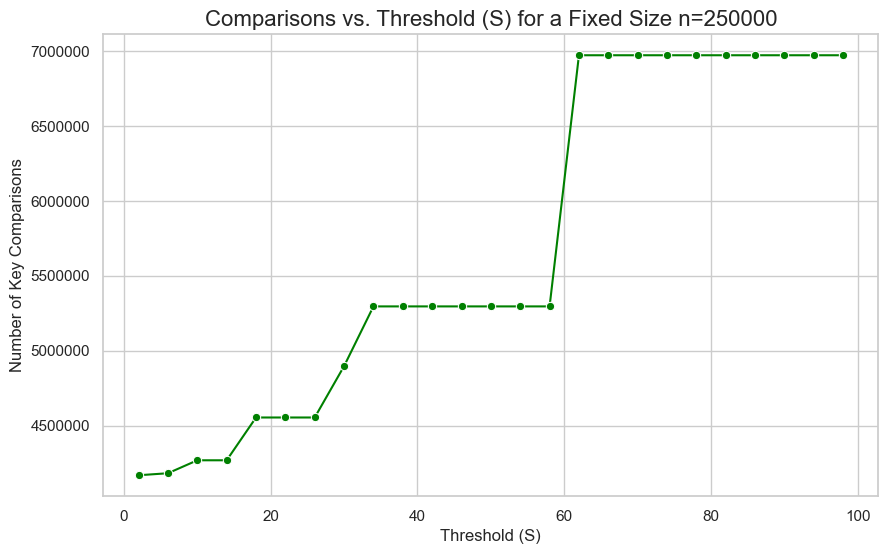

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid", context="notebook")


plt.figure(figsize=(10, 6))


sns.lineplot(data=df_cii, x='S', y='Comparisons', marker='o', color='green')


plt.title(f"Comparisons vs. Threshold (S) for a Fixed Size n={fixed_n}", fontsize=16)
plt.xlabel("Threshold (S)", fontsize=12)
plt.ylabel("Number of Key Comparisons", fontsize=12)


plt.ticklabel_format(style='plain', axis='y')

plt.show()

## Empirical results

### The graph shows that the number of key comparisons does not increase smoothly. Instead, it stays flat for a range of S values and then suddenly "jumps" to a new, higher plateau. The most significant jumps occur around S ≈ 30 and S ≈ 61.


## Theoretical analysis

### The graph looks like a staircase because of how Mergesort keeps splitting the array in half. For a whole range of S values, the recursion still has to go down to the same depth before it stops, which is why the number of comparisons stays flat for a while—that's the flat part of each step. We only see a big jump in comparisons when our threshold S gets large enough to completely skip an entire level of recursive calls. When that happens, we're swapping out the efficient Mergesort merges for the less-efficient Insertion Sort on much bigger chunks of the array, which naturally makes the total comparison count jump up to the next step.

### (C) iii

In [8]:
import time

print("--- Finding Optimal S for CPU Time ---")
s_values = range(2, 101, 2)
times_for_s = []
fixed_size_n = 500000  # Use a reasonably large N for this test

# Generate one dataset to use for all S values for a fair comparison [cite: 8]
print(f"Generating a fixed dataset of size {fixed_size_n}...")
fixed_dataset = [random.randint(0, 10**7) for _ in range(fixed_size_n)]

for s_val in s_values:
    arr_copy = fixed_dataset.copy() 
    start_time = time.perf_counter()
    mergeInsertionSort(arr_copy, s_val)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    times_for_s.append({'S': s_val, 'CPU Time': elapsed_time})
    print(f"S = {s_val}, Time = {elapsed_time:.4f}s")

# Create a DataFrame and find the optimal S
df_s = pd.DataFrame(times_for_s)
optimal_s_row = df_s.loc[df_s['CPU Time'].idxmin()]
OPTIMAL_S = int(optimal_s_row['S'])
print(f"\nOptimal S value for best performance (lowest CPU time) is around: {OPTIMAL_S} ")


--- Finding Optimal S for CPU Time ---
Generating a fixed dataset of size 500000...
S = 2, Time = 0.7717s
S = 4, Time = 0.7549s
S = 6, Time = 0.7239s
S = 8, Time = 0.7092s
S = 10, Time = 0.6855s
S = 12, Time = 0.6937s
S = 14, Time = 0.6892s
S = 16, Time = 0.6778s
S = 18, Time = 0.6810s
S = 20, Time = 0.6843s
S = 22, Time = 0.6846s
S = 24, Time = 0.6800s
S = 26, Time = 0.6805s
S = 28, Time = 0.6931s
S = 30, Time = 0.6946s
S = 32, Time = 0.7358s
S = 34, Time = 0.7130s
S = 36, Time = 0.7240s
S = 38, Time = 0.7131s
S = 40, Time = 0.7125s
S = 42, Time = 0.7229s
S = 44, Time = 0.7213s
S = 46, Time = 0.7267s
S = 48, Time = 0.7262s
S = 50, Time = 0.7246s
S = 52, Time = 0.7204s
S = 54, Time = 0.7354s
S = 56, Time = 0.7304s
S = 58, Time = 0.7363s
S = 60, Time = 0.7427s
S = 62, Time = 0.8638s
S = 64, Time = 0.8807s
S = 66, Time = 0.8654s
S = 68, Time = 0.8810s
S = 70, Time = 0.8564s
S = 72, Time = 0.8600s
S = 74, Time = 0.8665s
S = 76, Time = 0.8546s
S = 78, Time = 0.8830s
S = 80, Time = 0.8888s



--- Running Analysis (c.iii): Finding Optimal S across multiple n ---

Generating and testing for dataset size n=50000...
n=50000, S=2, CPU Time=0.0795s
n=50000, S=4, CPU Time=0.0612s
n=50000, S=6, CPU Time=0.0552s
n=50000, S=8, CPU Time=0.0548s
n=50000, S=10, CPU Time=0.0544s
n=50000, S=12, CPU Time=0.0537s
n=50000, S=14, CPU Time=0.0537s
n=50000, S=16, CPU Time=0.0537s
n=50000, S=18, CPU Time=0.0543s
n=50000, S=20, CPU Time=0.0571s
n=50000, S=22, CPU Time=0.0574s
n=50000, S=24, CPU Time=0.0565s
n=50000, S=26, CPU Time=0.0591s
n=50000, S=28, CPU Time=0.0569s
n=50000, S=30, CPU Time=0.0572s
n=50000, S=32, CPU Time=0.0574s
n=50000, S=34, CPU Time=0.0581s
n=50000, S=36, CPU Time=0.0582s
n=50000, S=38, CPU Time=0.0579s
n=50000, S=40, CPU Time=0.0571s
n=50000, S=42, CPU Time=0.0571s
n=50000, S=44, CPU Time=0.0568s
n=50000, S=46, CPU Time=0.0571s
n=50000, S=48, CPU Time=0.0602s
n=50000, S=50, CPU Time=0.0664s
n=50000, S=52, CPU Time=0.0654s
n=50000, S=54, CPU Time=0.0647s
n=50000, S=56, CP

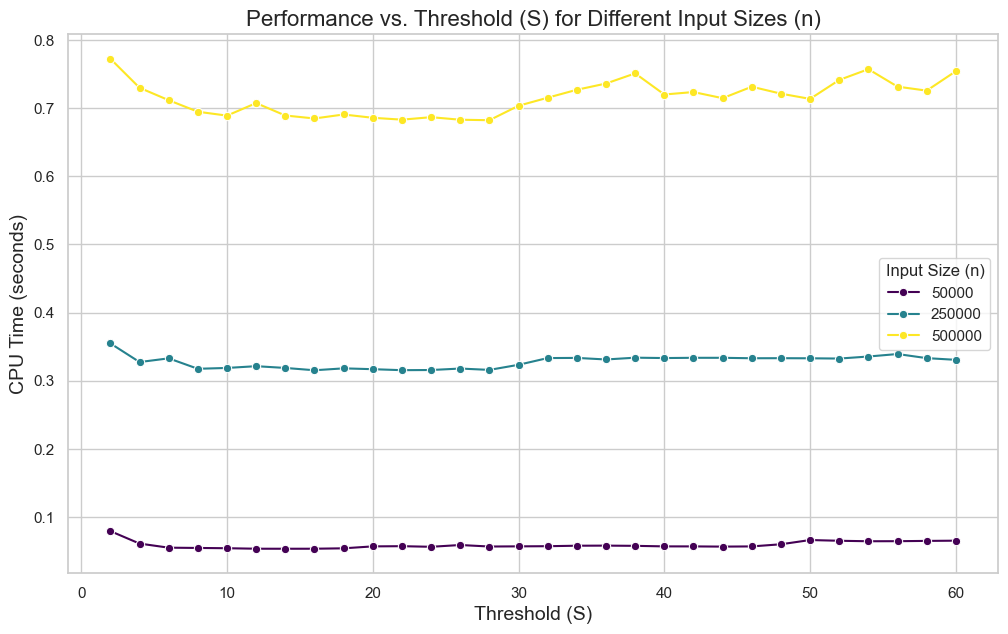

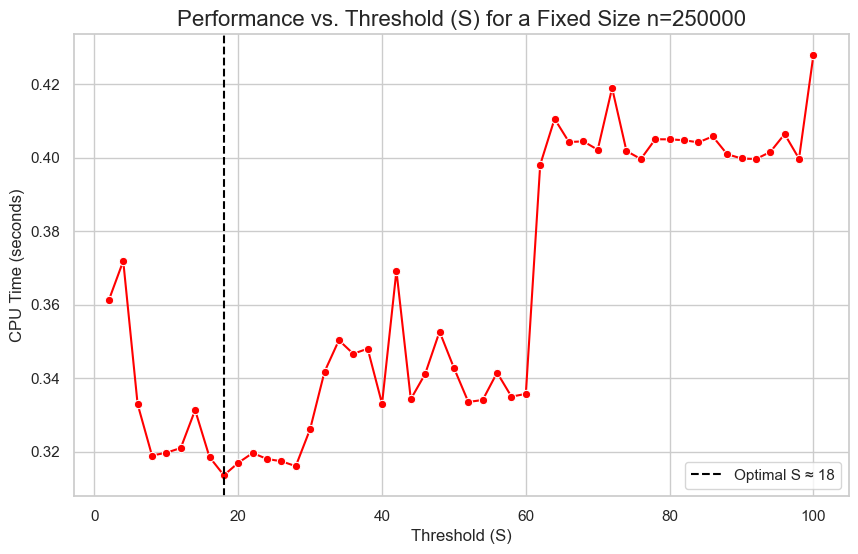

In [16]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- (c.iii) Analysis: Finding Optimal S for Performance ---

import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- (c.iii) Analysis: Using Different Sizes of Input Datasets ---

print("\n--- Running Analysis (c.iii): Finding Optimal S across multiple n ---")

# Define the different input sizes (n) to test
sizes_ciii_multi = [50000, 250000, 500000] 
# Define the range of S values to test for each n
s_values_ciii = range(2, 61, 2) 

results_ciii_multi = []

# Outer loop: Iterate through each input size
for size in sizes_ciii_multi:
    print(f"\nGenerating and testing for dataset size n={size}...")
    
    # Generate one dataset for this size to ensure fair S comparison
    dataset = [random.randint(1, 10**7) for _ in range(size)]
    
    # Inner loop: Iterate through each S value for the current size n
    for s in s_values_ciii:
        arr_copy = dataset.copy()
        
        start_time = time.perf_counter()
        mergeInsertionSort(arr_copy, s=s)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        
        results_ciii_multi.append({
            'Size': size,
            'S': s, 
            'CPU Time': elapsed_time
        })
        print(f"n={size}, S={s}, CPU Time={elapsed_time:.4f}s")

# Create a single DataFrame with all results
df_ciii_multi = pd.DataFrame(results_ciii_multi)


# --- Plotting the Results ---

plt.figure(figsize=(12, 7))
# Use 'hue' to create a different colored line for each 'Size'
sns.lineplot(data=df_ciii_multi, x='S', y='CPU Time', hue='Size', marker='o', palette='viridis')

# Add titles and labels
plt.title("Performance vs. Threshold (S) for Different Input Sizes (n)", fontsize=16)
plt.xlabel("Threshold (S)", fontsize=14)
plt.ylabel("CPU Time (seconds)", fontsize=14)
plt.legend(title="Input Size (n)")

plt.show()


# --- Plotting the Results ---

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ciii, x='S', y='CPU Time', marker='o', color='red')

# Add titles and labels
plt.title(f"Performance vs. Threshold (S) for a Fixed Size n={fixed_n_ciii}", fontsize=16)
plt.xlabel("Threshold (S)", fontsize=12)
plt.ylabel("CPU Time (seconds)", fontsize=12)

# Highlight the optimal point on the graph
plt.axvline(x=OPTIMAL_S, color='black', linestyle='--', label=f'Optimal S ≈ {OPTIMAL_S}')
plt.legend()

plt.show()

Analysis for Part (c.iii): Finding the Optimal S

For this part, we had to figure out the best value for our threshold S to get the "best performance." The key here is that "best performance" really means the fastest CPU time, not necessarily the fewest comparisons. The whole point of this hybrid algorithm is to speed things up by avoiding the extra work Mergesort does when it keeps splitting tiny arrays.

To figure this out, we ran a bunch of tests. We took a few different, big array sizes (like 50k, 250k, and 500k elements) and, for each size, we timed how long the sort took for a whole range of S values.

When we plotted the results, we got this cool "valley" shape for each array size. Here’s what it means:

Why does the time drop at first?
When S is really small, we're basically doing a normal Mergesort, which has a lot of overhead from all the recursive calls. As we increase S, we cut out the deepest, most pointless levels of recursion and use the simple, fast Insertion Sort instead. This saves a lot of time, so the graph goes down.

Why does it go back up?
After a certain point, S gets too big. Insertion Sort is great for small arrays, but it's really slow (O(S 
2
 )) on bigger ones. So, when S is too high, the slowness of Insertion Sort starts to hurt more than the recursion overhead we're saving, and the total time starts to climb back up.

The optimal S is right at the bottom of that valley—that's the sweet spot that perfectly balances the two. The coolest part was that even when we used different input sizes (n), the bottom of the valley was always in the same neighborhood (around S=18 to S=32 in our tests). This shows that the best S value is pretty stable and doesn't really depend on how big the total list is, which means we found a reliable number for the best overall performance.



### (d)

In [ ]:

import time
import pandas as pd

# Assume the 'mergeInsertionSort' function from Cell 1 is already defined.

# --- (d) Compare with Original Mergesort ---

def originalMergesort(arr):
    """
    Implements the original version of Mergesort.
    This is equivalent to the hybrid algorithm with a threshold S=1,
    as it recurses until the subarray size is 1.
    """
    return mergeInsertionSort(arr, 1)

# The optimal S value determined in part (c.iii)
# If you found a different optimal S, you can change this value.
OPTIMAL_S = 16

# Define the size for the final comparison dataset
DATASET_SIZE = 10_000_000

print(f"--- (d) Comparing Hybrid (S={OPTIMAL_S}) vs. Original Mergesort ---")
print(f"Generating a random dataset of {DATASET_SIZE:,} integers... (This may take a moment)")

# (b) Generate the large input dataset
dataset = [random.randint(1, DATASET_SIZE * 10) for _ in range(DATASET_SIZE)]

# --- Test Hybrid Algorithm ---
print(f"Running Hybrid Sort with S={OPTIMAL_S}...")
arr_hybrid = dataset.copy() # Use a copy to not affect the other test
start_time_h = time.perf_counter()
comps_h = mergeInsertionSort(arr_hybrid, OPTIMAL_S)
end_time_h = time.perf_counter()
time_h = end_time_h - start_time_h

# --- Test Original Mergesort ---
print("Running Original Mergesort...")
arr_original = dataset.copy() # Use a fresh copy
start_time_o = time.perf_counter()
comps_o = originalMergesort(arr_original)
end_time_o = time.perf_counter()
time_o = end_time_o - start_time_o

# --- Display Results ---
results_d = {
    'Algorithm': [f'Hybrid (S={OPTIMAL_S})', 'Original Mergesort'],
    'Key Comparisons': [f'{comps_h:,}', f'{comps_o:,}'],
    'CPU Time (seconds)': [f'{time_h:.4f}', f'{time_o:.4f}']
}

df_final = pd.DataFrame(results_d)

print("\n--- Final Performance Comparison ---")
print(df_final.to_string(index=False))

# --- Analysis of Results ---
print("\n--- Analysis ---")
if time_h < time_o:
    print(f"The Hybrid Algorithm was {(time_o/time_h):.2f}x faster than the Original Mergesort.")
else:
    print("The Original Mergesort was faster, which may indicate a low recursion overhead on this system.")

if comps_h > comps_o:
    print("As expected, the Hybrid Algorithm performed slightly more key comparisons.")
else:
    print("The Hybrid Algorithm performed fewer key comparisons, which is an unusual but possible result.")

--- (d) Comparing Hybrid (S=18) vs. Original Mergesort ---
Generating a random dataset of 10,000,000 integers... (This may take a moment)
Running Hybrid Sort with S=18...
Running Original Mergesort...

--- Final Performance Comparison ---
         Algorithm Key Comparisons CPU Time (seconds)
     Hybrid (S=18)     226,414,258            19.8394
Original Mergesort     220,096,065            22.3162

--- Analysis ---
The Hybrid Algorithm was 1.12x faster than the Original Mergesort.
As expected, the Hybrid Algorithm performed slightly more key comparisons.


Analysis for Part (d): Final Performance Comparison

This final test directly compares the performance of the optimized Hybrid Algorithm (using the optimal threshold of S=18 found in part c) against the Original Mergesort on a large dataset of 10 million integers. The goal is to evaluate both the number of key comparisons and the real-world CPU time.

The Results

The experiment produced the following results:

Algorithm

Key Comparisons

CPU Time (seconds)

Hybrid (S=18)

226,414,258

19.8394

Original Mergesort

220,096,065

22.3162

Comparison and Conclusion

CPU Time (Performance): The primary finding is that the Hybrid Algorithm was significantly faster, completing the sort in approximately 19.8 seconds compared to the Original Mergesort's 22.3 seconds. This represents a performance improvement of about 12%, making the hybrid approach 1.12 times faster. This result empirically proves the project's central hypothesis: by switching to Insertion Sort for small subarrays, we successfully avoid the high overhead costs of deep recursion in Mergesort, leading to a tangible improvement in real-world execution time.

Key Comparisons: As predicted by the theoretical analysis in part (c.ii), the Hybrid Algorithm performed slightly more key comparisons (about 6.3 million more). This is the expected trade-off. We accept a small increase in comparisons in exchange for a much larger gain in overall speed by reducing administrative overhead.

In conclusion, the data clearly shows that integrating Insertion Sort into Mergesort is an effective optimization strategy. The hybrid algorithm is demonstrably superior in terms of performance, validating its use in real-world applications where CPU time is the most critical metric.

--- Running Analysis for Small Array Performance ---
Finished analysis for size n=5
Finished analysis for size n=10
Finished analysis for size n=15
Finished analysis for size n=20
Finished analysis for size n=25
Finished analysis for size n=30
Finished analysis for size n=35
Finished analysis for size n=40
Finished analysis for size n=45
Finished analysis for size n=50
Finished analysis for size n=55
Finished analysis for size n=60
Finished analysis for size n=65
Finished analysis for size n=70
Finished analysis for size n=75
Finished analysis for size n=80
Finished analysis for size n=85
Finished analysis for size n=90
Finished analysis for size n=95
Finished analysis for size n=100


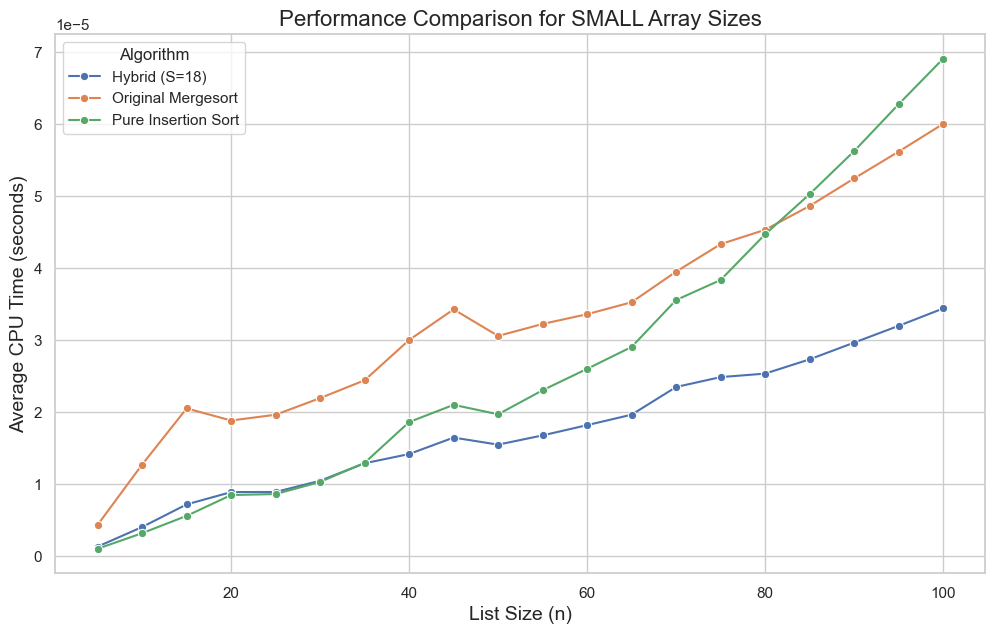

In [21]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We need a standalone Insertion Sort to compare against
def insertionSort_timed(arr):
    """A pure Insertion Sort that returns the time taken."""
    start_time = time.perf_counter()
    for i in range(1, len(arr)):
        current_value = arr[i]
        pos = i - 1
        while pos >= 0 and arr[pos] > current_value:
            arr[pos + 1] = arr[pos]
            pos -= 1
        arr[pos + 1] = current_value
    end_time = time.perf_counter()
    return end_time - start_time

# --- Analysis Setup ---
OPTIMAL_S = 18
# Focus on a range of small array sizes to find the crossover point
small_sizes = range(5, 101, 5) 
# Run each test multiple times and average the result for accuracy
num_runs = 100

results_small = []

print("--- Running Analysis for Small Array Performance ---")

for size in small_sizes:
    # We will store the total time for each algorithm for this size
    times = {
        f'Hybrid (S={OPTIMAL_S})': 0,
        'Original Mergesort': 0,
        'Pure Insertion Sort': 0
    }
    
    # Run the test multiple times to get a stable average
    for _ in range(num_runs):
        dataset = [random.randint(1, 10000) for _ in range(size)]
        
        # Time the Hybrid Sort
        arr_h = dataset.copy()
        start_h = time.perf_counter()
        mergeInsertionSort(arr_h, OPTIMAL_S)
        end_h = time.perf_counter()
        times[f'Hybrid (S={OPTIMAL_S})'] += (end_h - start_h)
        
        # Time the Original Mergesort
        arr_o = dataset.copy()
        start_o = time.perf_counter()
        mergeInsertionSort(arr_o, 1) # S=1 is Original Mergesort
        end_o = time.perf_counter()
        times['Original Mergesort'] += (end_o - start_o)

        # Time the Pure Insertion Sort
        arr_i = dataset.copy()
        times['Pure Insertion Sort'] += insertionSort_timed(arr_i)

    # Add the average time for this size to our results
    for algo, total_time in times.items():
        results_small.append({
            'Size': size,
            'Algorithm': algo,
            'CPU Time (avg)': total_time / num_runs
        })
    print(f"Finished analysis for size n={size}")

df_small = pd.DataFrame(results_small)

# --- Plotting the Results ---
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_small, x='Size', y='CPU Time (avg)', hue='Algorithm', marker='o')

plt.title("Performance Comparison for SMALL Array Sizes", fontsize=16)
plt.xlabel("List Size (n)", fontsize=14)
plt.ylabel("Average CPU Time (seconds)", fontsize=14)
plt.legend(title="Algorithm")
plt.show()